# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
import pandas as pd
import numpy as np

x = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'x': x, 'y': y})
student_data

,x,y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

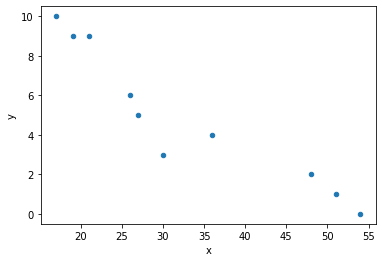

In [6]:
# Your code here.
student_data.plot.scatter(x = 'x', y = 'y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

### Your response here. 
Looks like there is a negative correlation between age and tardies - so the older you are the less tardies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
corr = student_data['x'].corr(student_data['y'])
cov = student_data['x'].cov(student_data['y'])
print(corr, cov)

-0.9391626886887122 -45.56666666666666


### Your response here.
#correlation:
93% correlation between age increasing and tardiness decreasing.

#covariance:
Because the two variables are on different sclaes, it is difficult to make an interpretation on how strongly related they are based on this number. However we can tell that the relationship is negative.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [33]:
# Your response here.

from scipy import stats
X = student_data['x']
Y = student_data['y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))

pred = [(slope * x + intercept) for x in X]
pred

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


[8.760850257564094,
 0.5049440464207464,
 6.332642548404286,
 7.789567173900171,
 4.1472556101604585,
 1.23340635916869,
 8.275208715732132,
 6.575463319320267,
 -0.2235182663271953,
 5.604180235656344]

Plot your regression model on your scatter plot.

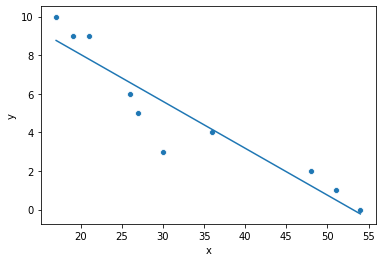

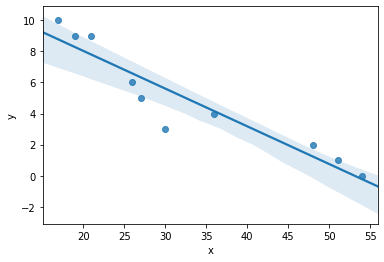

In [40]:
# Your code here.
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x = 'x', y = 'y', data = student_data)
sns.lineplot(x = 'x', y = pred, data = student_data)
plt.show()

sns.regplot(x = 'x', y = 'y', data = student_data)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

### Your response here. 
- Yes, age is a good predictor of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('../../../Class/vehicles/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [46]:
lst = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

corrs = [(x + str(vehicles['CO2 Emission Grams/Mile'].corr(vehicles[x]))) for x in lst]
corrs

['Year-0.22229960295054238',
 'Cylinders0.7523925537297486',
 'Fuel Barrels/Year0.9861886621428727',
 'Combined MPG-0.9262290389336444',
 'Fuel Cost/Year0.9308651512201843']

### Your response here. 
- Fuel Barrels / Year has a 98% correlation with CO2 Emission Grams / Mile and is the most important. 
- However Combined MPG and Fuel Cost / Year also have above 90% correlation and could be important predictors.
- Year is the least useful variable.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression

Y = vehicles['CO2 Emission Grams/Mile']
X = vehicles[['Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG']]
lm = LinearRegression()
model = lm.fit(X,Y)

print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

predictions  = lm.predict(X)
predictions

Intercept:  131.67417184227583
Coef:  [19.69545749  0.03166095 -3.166074  ]


array([521.46152372, 670.62139196, 553.24372516, ..., 232.85088351,
       232.85088351, 242.7522431 ])

### Your response here. 
- Using a multiple regression with 3 x variables

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

# Your response here. 
- THe intercept of 131 signifies that with 0 as the input for all x variables, there would still be 131 CO2 Emission Grams/Mile
- The coefficient shows an increase in 1 Fuel Barrel/Year would predict an increase of 19 more CO2 Emission Grams/Mile - this is the highest coefficient in the above three variables. However given the differences in units, it is difficult to compare.
- Fuel Cost / Year also has a positive relationship where 1 unit increase in costs would result in 0.03 increase in CO2.
- Combined MPG is negative however meaning the higher the vehicles MPG capacity, the lower it's CO2 emission grams per mile.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [65]:
# Your code here.
invite = [1,3,4,6,8,9,11,14]
attend = [1,2,4,4,5,7,8,13]

party = pd.DataFrame({'invite' : invite, 'attend' : attend})
party.head(20)

,invite,attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

The slope is: 0.8484848484848485
The intercept is: -0.43939393939393945


[0.40909090909090906,
 2.106060606060606,
 2.9545454545454546,
 4.651515151515151,
 6.348484848484849,
 7.196969696969697,
 8.893939393939394,
 11.43939393939394]

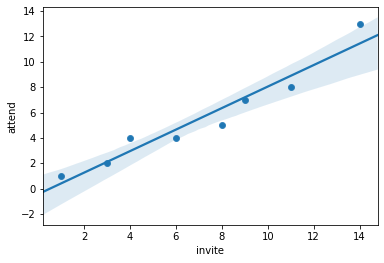

In [64]:
# Your code here.
sns.scatterplot(x = 'invite', y = 'attend', data = party)
sns.regplot(x = 'invite', y = 'attend', data = party)

X = party['invite']
Y = party['attend']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))

pred = [(slope * x + intercept) for x in X]
pred

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

### Your response here. 
- There is a positive relationship - the more you invite, the more people can attend.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The slope is: 0.6832740213523132
The intercept is: 0.3309608540925266


[2.380782918149466,
 3.0640569395017794,
 4.430604982206406,
 5.797153024911032,
 6.480427046263345,
 7.846975088967972]

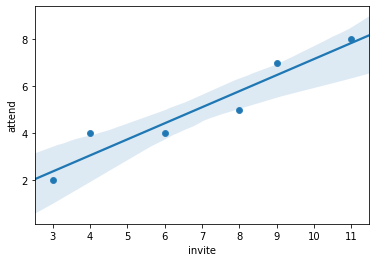

In [70]:
# Your response here. 
party2 = party[1:-1]

sns.scatterplot(x = 'invite', y = 'attend', data = party2)
sns.regplot(x = 'invite', y = 'attend', data = party2)

X = party2['invite']
Y = party2['attend']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ("The slope is: " + str(slope))
print ("The intercept is: " + str(intercept))

pred = [(slope * x + intercept) for x in X]
pred

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

### Your response here. 
- Removed the highest point in the data, which was bringing up the slope of the line.
- Also removed the first point - not sure 1 is a party.
- These removals make it seem more linear.
- Looking at the full dataset however, the relationship may not be fully linear.
- Another issue is that the point at 0 should be 0, so perhaps it is not a fully linear relationship.